In [1]:
import torch
from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video

from PIL import Image, ImageFilter

/home/sushanth/.conda/envs/py311diffuser/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


mode = RGB, size = (1024, 576)


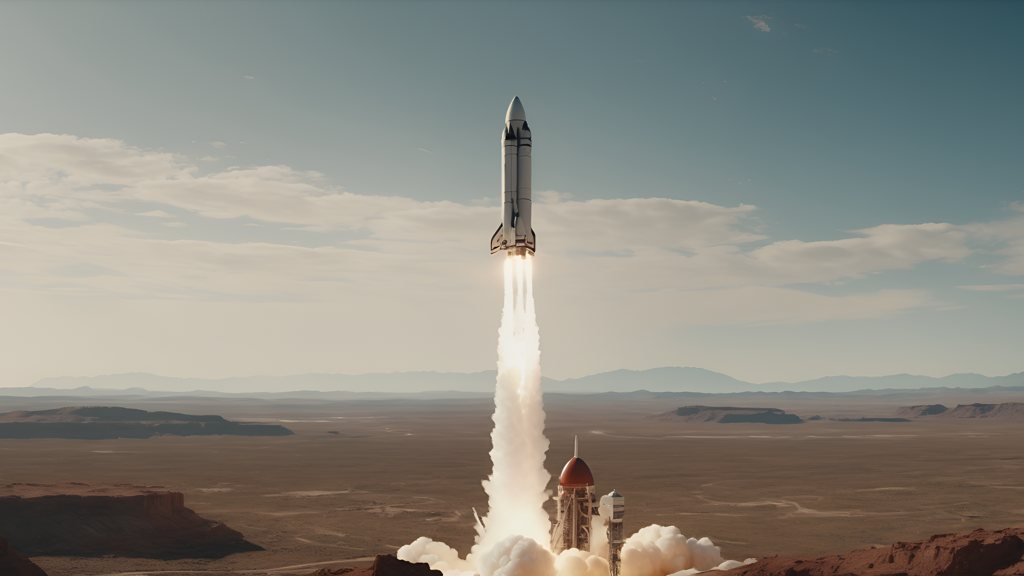

In [2]:
rocket_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/svd/rocket.png")
print(f'mode = {rocket_image.mode}, size = {rocket_image.size}')
rocket_image

mode = RGBA, size = (612, 408)


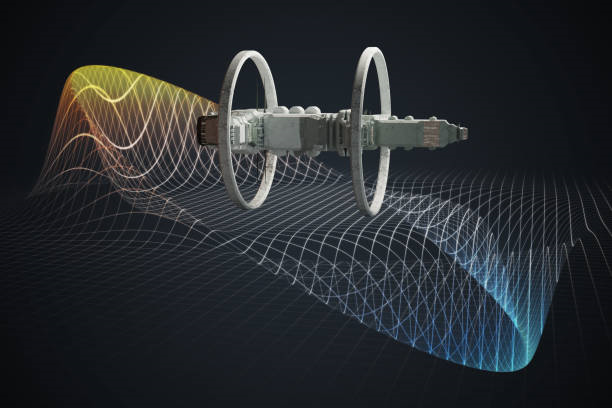

In [3]:
image = Image.open("warpdrive1.png")
#image = image.resize((1024, 576))
print(f'mode = {image.mode}, size = {image.size}')
image

In [4]:
import torch
from diffusers import StableVideoDiffusionPipeline
from diffusers.utils import load_image, export_to_video

pipeline = StableVideoDiffusionPipeline.from_pretrained(
    "stabilityai/stable-video-diffusion-img2vid-xt", torch_dtype=torch.float16, variant="fp16"
)
pipeline.enable_model_cpu_offload()



Loading pipeline components...:  40%|████      | 2/5 [00:00<00:00, 12.30it/s]

Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00, 15.20it/s]


In [5]:
generator = torch.manual_seed(42)
frames = pipeline(rocket_image, decode_chunk_size=8, generator=generator).frames[0]
export_to_video(frames, "generated_rocket.mp4", fps=7)

100%|██████████| 25/25 [01:05<00:00,  2.60s/it]


'generated_rocket.mp4'

In [6]:
# generator = torch.manual_seed(42)
# frames = pipeline(image, decode_chunk_size=8, generator=generator).frames[0]
# export_to_video(frames, "generated_warp.mp4", fps=7)

ValueError: Unable to infer channel dimension format

In [ ]:
# from diffusers import MusicLDMPipeline
# import torch
# import scipy

# repo_id = "ucsd-reach/musicldm"
# pipe = MusicLDMPipeline.from_pretrained(repo_id, torch_dtype=torch.float16)
# pipe = pipe.to("cuda")

# prompt = "Techno music with a strong, upbeat tempo and high melodic riffs"
# audio = pipe(prompt, num_inference_steps=10, audio_length_in_s=5.0).audios[0]

# # save the audio sample as a .wav file
# scipy.io.wavfile.write("techno.wav", rate=16000, data=audio)